/var/folders/h3/wjyzn31x6353g0dg6wf0m8jr0000gn/T/ipykernel_82572/558051764.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://urldefense.com/v3/__https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.*5Cn__;JQ!!Mih3wA!G_VwTNG6fVY0fS3USLGYuV-NjkKvLsifUM4Cn28yuvSQJSa9Z7jxvxBNj-OoOpB32Xp_71IjSlcOTcBz$   world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


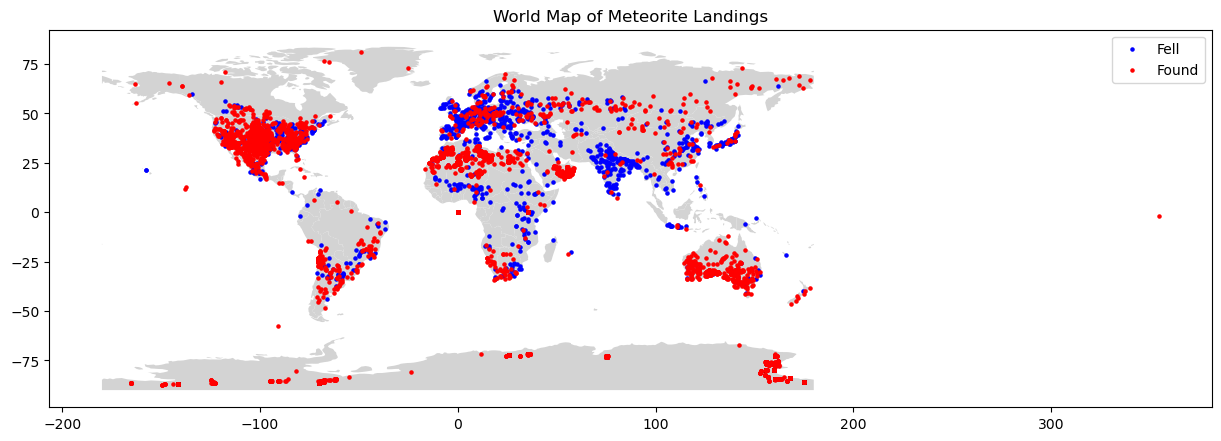

In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np
file_path = '/Users/evelyn/Desktop/ECE_143/project/group9/Meteorite_Landings.csv'
meteorites_df = pd.read_csv(file_path)

meteorites_df.dropna(subset=['reclat', 'reclong'], inplace=True)

geometry = [Point(xy) for xy in zip(meteorites_df['reclong'], meteorites_df['reclat'])]
geo_meteorites_df = gpd.GeoDataFrame(meteorites_df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 10))

world.plot(ax=ax, color='lightgrey')

fell = geo_meteorites_df[geo_meteorites_df['fall'] == 'Fell']
found = geo_meteorites_df[geo_meteorites_df['fall'] == 'Found']

fell.plot(ax=ax, color='blue', markersize=5, label='Fell')
found.plot(ax=ax, color='red', markersize=5, label='Found')

ax.legend()
ax.set_title('World Map of Meteorite Landings')

plt.show()


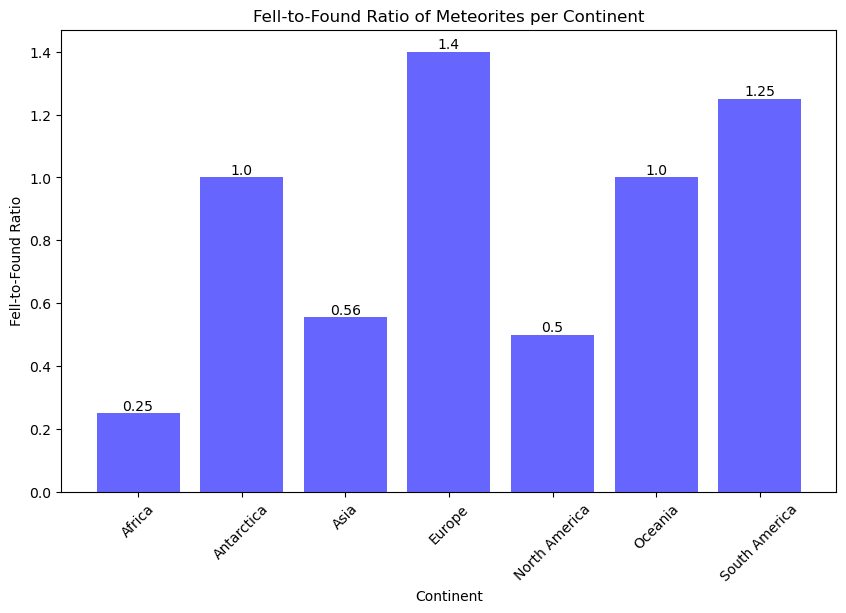

In [9]:
np.random.seed(0)
sample_data = {
    'Name': np.random.choice(['MeteoriteA', 'MeteoriteB', 'MeteoriteC'], 100),
    'Mass (g)': np.random.uniform(10, 1000, 100),
    'Fall': np.random.choice(['Fell', 'Found'], 100),
    'Year': np.random.randint(1800, 2021, 100),
    'Latitude': np.random.uniform(-90, 90, 100),
    'Longitude': np.random.uniform(-180, 180, 100),
    'Continent': np.random.choice(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania', 'Antarctica'], 100)
}

meteorites_df = pd.DataFrame(sample_data)

fell_found_counts = meteorites_df.groupby(['Continent', 'Fall']).size().unstack(fill_value=0)
fell_found_ratio = fell_found_counts['Fell'] / fell_found_counts['Found']
fell_found_ratio = fell_found_ratio.fillna(0)  

plt.figure(figsize=(10, 6))
bars = plt.bar(fell_found_ratio.index, fell_found_ratio.values, color='blue', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Continent')
plt.ylabel('Fell-to-Found Ratio')
plt.title('Fell-to-Found Ratio of Meteorites per Continent')
plt.xticks(rotation=45)

plt.show()
